# Demo: Geodaten visualisieren

## Kernel Density Plot

Mit der Erweiterung `seaborn` lassen sich mit wenigen Zeilen Code eine *Kernel Density* rechnen und visualisieren. Siehe nachstehenden Code:

In [16]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import descartes

zeckenstiche_full = pd.read_csv("zeckenstiche_full.csv")

wald = gpd.read_file("wald.gpkg")
zeckenstiche_gpd = gpd.GeoDataFrame(zeckenstiche_full,
                                         geometry=gpd.points_from_xy(zeckenstiche_full['x'], zeckenstiche_full['y']),
                                         crs = 2056) 



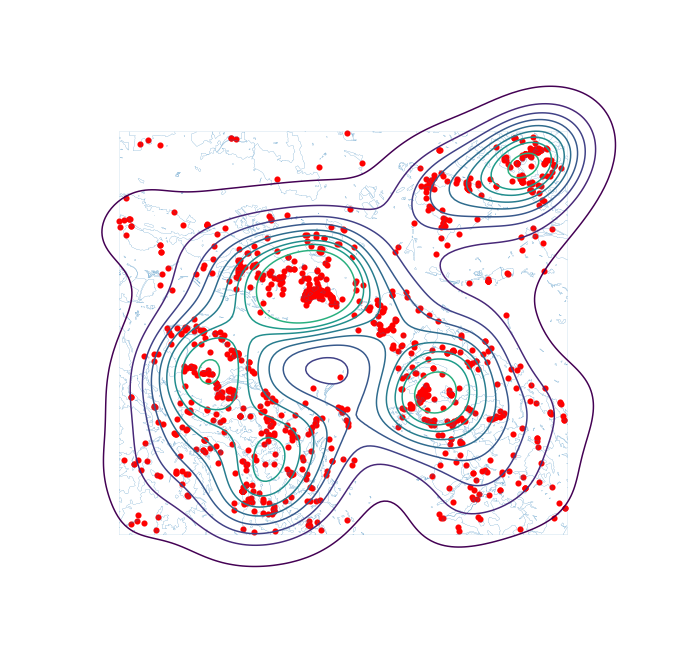

In [29]:
f, ax = plt.subplots(1, figsize=(12, 12))
wald.boundary.plot(linewidth=0.1, ax=ax)
zeckenstiche_gpd.plot(color='red', linewidth=0.1, ax=ax)

sns.kdeplot(x = zeckenstiche_full.x, y= zeckenstiche_full.y,shade = False,n_levels = 10, cmap = "viridis", ax = ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

## Hintergrundkarte

Mit der Erweiterung `contextily` kann man sehr schnell und einfach Hintergrundkarten in den Plot einbinden. Dafür muss das *GeoDataFrame* vorher aber in WGS84 Koordinaten (EPSG 3857) konvertiert werden (mit `to_crs`, s.u.).

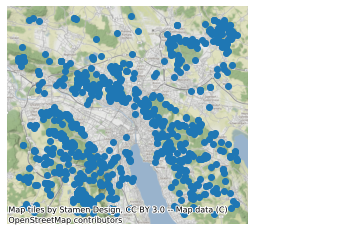

In [12]:
import contextily as ctx
ax = zeckenstiche.to_crs(epsg = 3857).plot()
ctx.add_basemap(ax)

ax.set_axis_off()
plt.show()

## KDE mit Hintergrundkarte

Kernel Denisty und Hintergrundkarte können auch kombiniert werden:

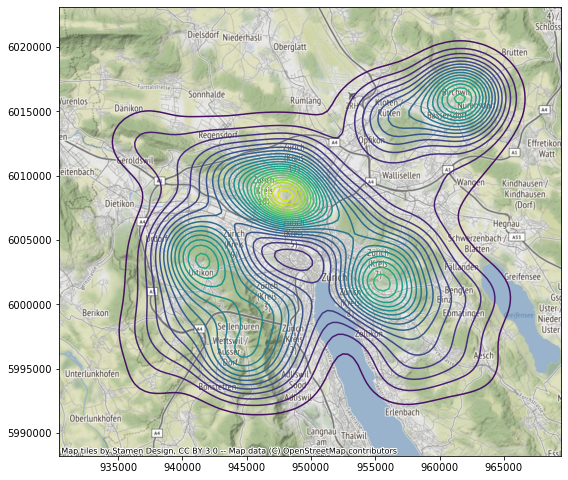

In [22]:
lat = zeckenstiche.to_crs(epsg = 3857).geometry.x
lng = zeckenstiche.to_crs(epsg = 3857).geometry.y

f, ax = plt.subplots(1, figsize=(12, 12))

sns.kdeplot(lat,lng,shade = False,n_levels = 25, cmap = "viridis", ax = ax)
ctx.add_basemap(ax)

